In [5]:
# 多输入的神经网络

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [6]:
# 获取房价数据集
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# print(housing.DESCR)
# print(housing.data.shape)    # X
# print(housing.target.shape)  # Y

In [7]:
# 拆分训练集、验证集和测试集
from sklearn.model_selection import train_test_split
# 默认按照3:1进行拆分，可设置test_size参数进行改变，其默认为0.25
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7, test_size = 0.25)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [8]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_valid_scaler = scaler.transform(x_valid)
x_test_scaler = scaler.transform(x_test)

In [9]:
# 多输入
# 一共有8个特征，前5个给wide, 后6个给deep
input_wide = keras.layers.Input(shape = [5])
input_deep = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_wide, input_deep], outputs = [output])
# 打印一下模型的信息
model.summary()
# 均方差 随机梯度下降
model.compile(loss='mean_squared_error', optimizer='adam')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [10]:
x_train_scaled_wide = x_train_scaler[:, :5]
x_train_scaled_deep = x_train_scaler[:, 2:]
x_valid_scaled_wide = x_valid_scaler[:, :5]
x_valid_scaled_deep = x_valid_scaler[:, 2:]
x_test_scaler_wide = x_test_scaler[:, :5]
x_test_scaler_deep = x_test_scaler[:, 2:]
history = model.fit([x_train_scaled_wide, x_train_scaled_deep], y_train, 
                    validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], y_valid),
                   epochs = 100, callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 158us/sample - loss: 1.7271 - val_loss: 0.8422
Epoch 2/100
11610/11610 [==============================] - 1s 81us/sample - loss: 0.6628 - val_loss: 0.6107
Epoch 3/100
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5347 - val_loss: 0.5188
Epoch 4/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4588 - val_loss: 0.4546
Epoch 5/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4137 - val_loss: 0.4069
Epoch 6/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3867 - val_loss: 0.4205
Epoch 7/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3789 - val_loss: 0.3741
Epoch 8/100
11610/11610 [==============================] - ETA: 0s - loss: 0.362 - 1s 69us/sample - loss: 0.3619 - val_loss: 0.3591
Epoch 9/100
11610/11610 [==============================] - 1s 

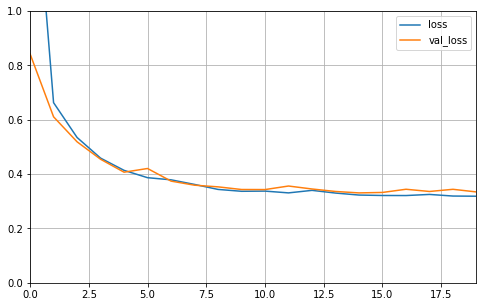

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

In [12]:
# 用测试集进行模型的评估    .返回损失值&模型的度量值
model.evaluate([x_test_scaler_wide, x_test_scaler_deep], y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.33426072796185813